# Titanic Prediction
## 1. Project Description

* Purpose: Build supervised models on Titanic dataset and predict whether passengers will survive or not
* Methods: Build with models of Logistic regress and Random Forest
* Evaluation: Compare the models of Logistic regress and Random Forest with accuracy, performance and others.


## 2. Data description 
***Data source: https://www.kaggle.com/datasets/pavlofesenko/titanic-extended***

This is a classic Titanic dataset extended with the features from the Titanic passenger list on Wikipedia available as of February 2019. It contains ***1309 entries*** and ***21 features*** in total.

The first 12 features in this dataset are the same as in the Titanic competition [kaggle](https://www.kaggle.com/). 

|Varaible   | Definition  | Key|
| :------------- |:-------------| :-----|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic||	
|ticket	|Ticket number	| |
|fare	|Passenger fare	| |
|cabin	|Cabin number	| |
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

The last 9 features are added from the [Titanic passenger list on Wikipedia](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) and are as follows:
* WikiId
* Name
* Age
* Hometown
* Boarded
* Destination
* Lifeboat
* Body
* Class


The new features are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.



In [1]:
# importing all the required libraries
import math
import pickle

from math import exp
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

##### Load the dataset and understand the dataset

There are actually three files from the data source, which are fill.csv, train.csv and test.csv, but I think only the fill.csv is enough for this task.

* Simplicity - Full.csv contain all the data including those in train.csv and test.csv
* Flexibility - You can split the data set many times and even in different proportions for specific task.


In [2]:
df = pd.read_csv("full.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


##### Identify categorical and numerical features/variables

In [4]:
# find categorical features
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical features\n'.format(len(categorical)))

print('The categorical features are :', categorical)


There are 11 categorical features

The categorical features are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']


##### There are 11 categorical features including 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat'  and 'Body.

In [5]:
# find numerical features

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical features\n'.format(len(numerical)))

print('The numerical features are :', numerical)

There are 10 numerical features

The numerical features are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'WikiId', 'Age_wiki', 'Class']


##### There are 10 categorical features including 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'WikiId', 'Age_wiki' and 'Class'.

## 3. Data Cleaning


### 3.1 Drop duplicated collume/features
As the feathers added from wikipedia are more up-to-date and have less missing value, I just choose to drop the duplicated features from original dataset.

|Original | Extended from wikipedia|
|:--------|:----------|
|Pclass|Class|
|Name|Name_wiki|
|Age|Age_wiki|
|Embarked|Boarded|

In [6]:
duplicated_features = ['Pclass', 'Name', 'Age', 'Embarked']
df = df.drop(duplicated_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   object 
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   object 
 6   Fare         1308 non-null   float64
 7   Cabin        295 non-null    object 
 8   WikiId       1304 non-null   float64
 9   Name_wiki    1304 non-null   object 
 10  Age_wiki     1302 non-null   float64
 11  Hometown     1304 non-null   object 
 12  Boarded      1304 non-null   object 
 13  Destination  1304 non-null   object 
 14  Lifeboat     502 non-null    object 
 15  Body         130 non-null    object 
 16  Class        1304 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 174.0+ KB


### 3.2 Check propotion of null value in each features


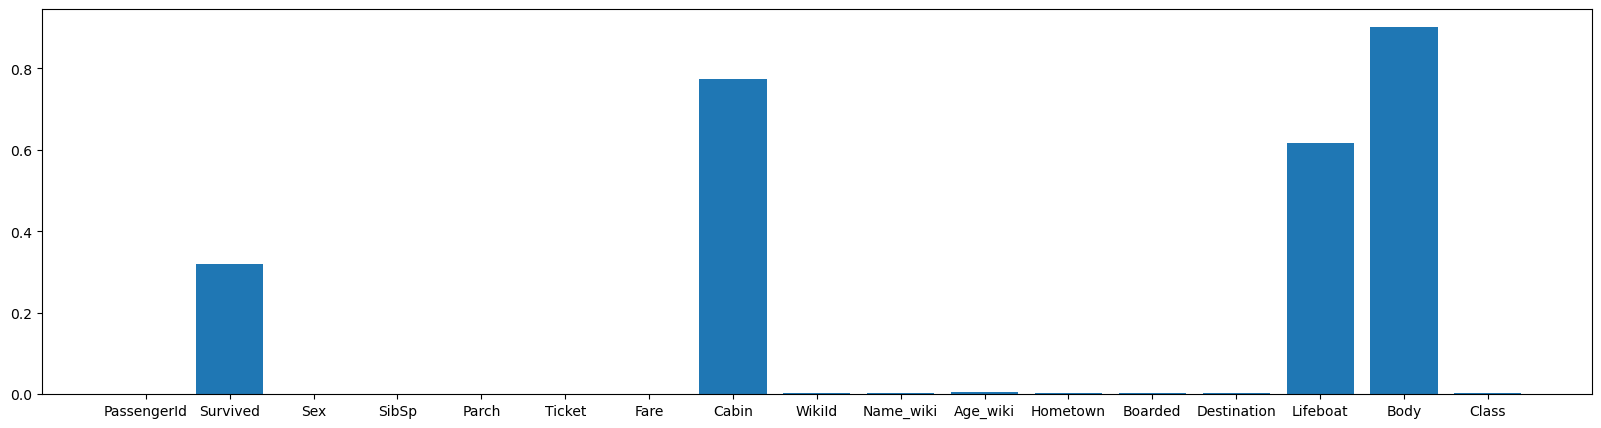

In [7]:

def null_propotion(df):
    propotions = []
    features = []
    for var in df.columns:
        p = df[var].isnull().sum()  / len(df[var])
        propotions.append(p)
        features.append(var)
        #print("Feature: {}  null value propotion:{}".format(var, p))
    #print(features)
    #print(propotions)

    fig = plt.figure(figsize = (20, 5))
    plt.bar(features, propotions)
    plt.show()
null_propotion(df)

* As we can see, over 50% of entries if Cabin, Lifeboat and Body is null, so we can just drop thoes features.
* There are more than 30% entries have no Survived label, because the full dataset combines the train set and test set which has no Survived value.
* I'm going to just drop those non value entries later.


In [8]:
null_features = ['Cabin', 'Lifeboat', 'Body']
df = df.drop(null_features, axis=1)


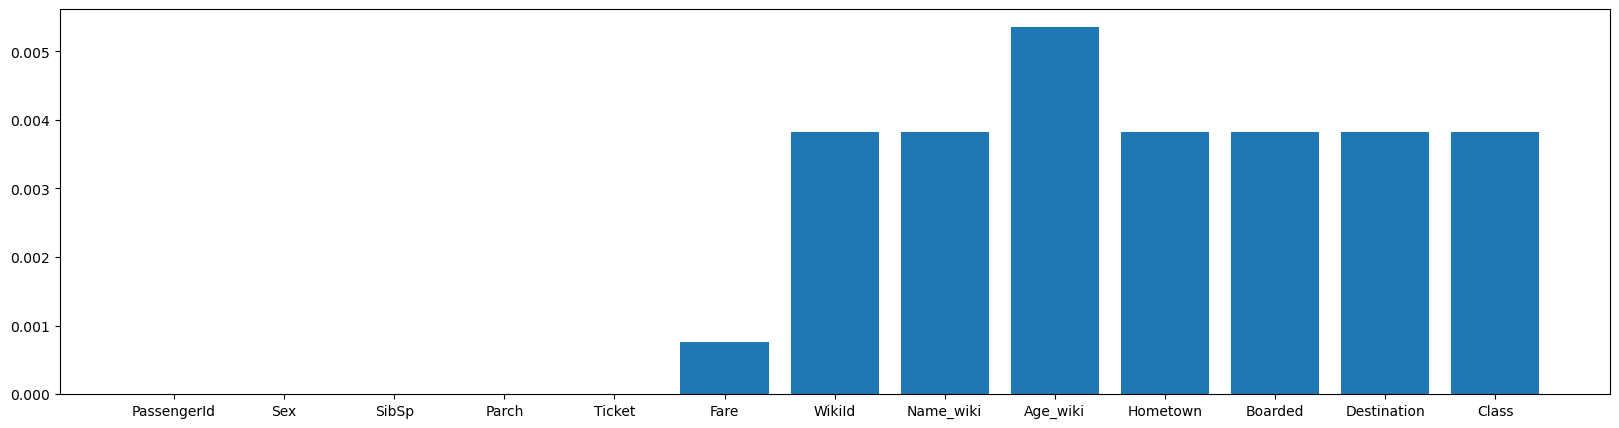

In [9]:
null_propotion(df.drop(['Survived'], axis=1))

* From the above graphic, we can see that there are less than 1% nan value in each features
* I'm going to just drop all of them, and that won't affect much for the size of the data set.

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  887 non-null    int64  
 1   Survived     887 non-null    float64
 2   Sex          887 non-null    object 
 3   SibSp        887 non-null    int64  
 4   Parch        887 non-null    int64  
 5   Ticket       887 non-null    object 
 6   Fare         887 non-null    float64
 7   WikiId       887 non-null    float64
 8   Name_wiki    887 non-null    object 
 9   Age_wiki     887 non-null    float64
 10  Hometown     887 non-null    object 
 11  Boarded      887 non-null    object 
 12  Destination  887 non-null    object 
 13  Class        887 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 103.9+ KB


* Still ***887*** entries remain.
* That will be enough for our model trainning.

### 3.3 Drop the features not helpful for this task


In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  887 non-null    int64  
 1   Survived     887 non-null    float64
 2   Sex          887 non-null    object 
 3   SibSp        887 non-null    int64  
 4   Parch        887 non-null    int64  
 5   Ticket       887 non-null    object 
 6   Fare         887 non-null    float64
 7   WikiId       887 non-null    float64
 8   Name_wiki    887 non-null    object 
 9   Age_wiki     887 non-null    float64
 10  Hometown     887 non-null    object 
 11  Boarded      887 non-null    object 
 12  Destination  887 non-null    object 
 13  Class        887 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 103.9+ KB


,PassengerId,Survived,Sex,SibSp,Parch,Ticket,Fare,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class
0,1,0.0,male,1,0,A/5 21171,7.2500,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,2,1.0,female,1,0,PC 17599,71.2833,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0
2,3,1.0,female,0,0,STON/O2. 3101282,7.9250,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0
3,4,1.0,female,1,0,113803,53.1000,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0
4,5,0.0,male,0,0,373450,8.0500,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0


* I don't think the variables like PassengerId, Ticket WikiId and Name_wili will affect the survial probability of a specific person at all. Becasue those values are just like your Identification number or social security number which radnonly give by a system.
* For the Hometown and Destination, I also don't think where you are from or where you wanna to will affect much of the survial probability.
* Therefor, I choose to drop those features making the subsequent processes more simple and efficient.

In [12]:
unhelpful_features = ['PassengerId', 'Ticket', 'WikiId', 'Name_wiki', 'Hometown', 'Destination']

df = df.drop(unhelpful_features, axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Sex       887 non-null    object 
 2   SibSp     887 non-null    int64  
 3   Parch     887 non-null    int64  
 4   Fare      887 non-null    float64
 5   Age_wiki  887 non-null    float64
 6   Boarded   887 non-null    object 
 7   Class     887 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 62.4+ KB


,Survived,Sex,SibSp,Parch,Fare,Age_wiki,Boarded,Class
0,0.0,male,1,0,7.2500,22.0,Southampton,3.0
1,1.0,female,1,0,71.2833,35.0,Cherbourg,1.0
2,1.0,female,0,0,7.9250,26.0,Southampton,3.0
3,1.0,female,1,0,53.1000,35.0,Southampton,1.0
4,0.0,male,0,0,8.0500,35.0,Southampton,3.0


## 4. EDA (Exploratory Data Analysis)
##### First of all, let's check out the distribution of all the features

df.shape (887, 8)
nCol:8 nGrapShown:18 nGraphRow:3


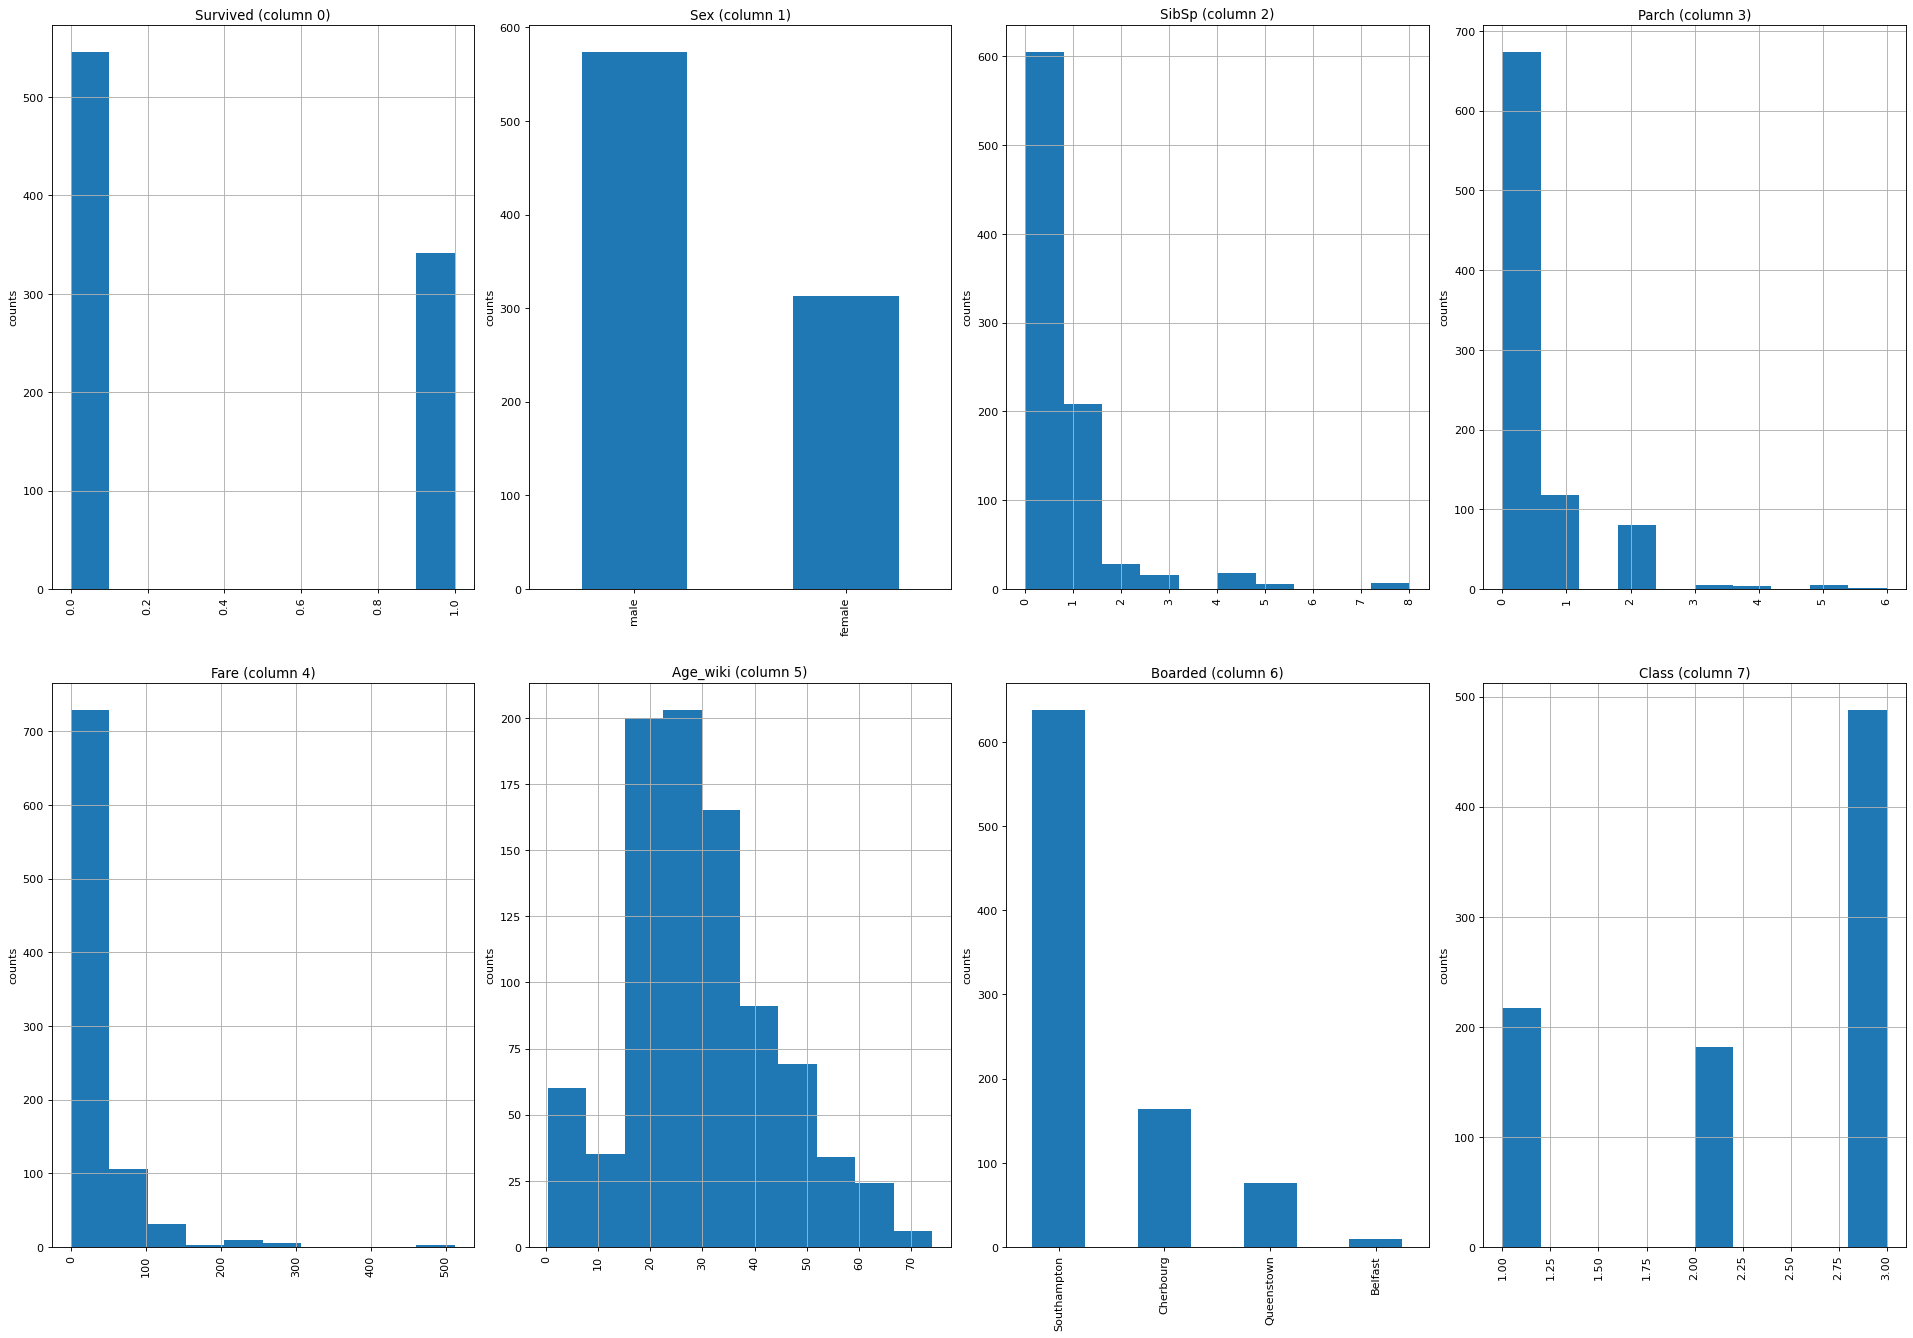

In [13]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print("df.shape", df.shape)
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print("nCol:{} nGrapShown:{} nGraphRow:{}".format(nCol, nGraphShown, nGraphRow))
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(df, 18, 4)

#### From the observation from the graphics above:
* The distributions of the "Survived" and "Sex" are very similar. "Sex" could be an improtant factor to determine if someone can survied.
* The "SibSp", the "Parch" and the"Fare" also have similar distribution. There could be some relationship among them.
* The distribution of age is like a normal distribution except the propotion of those age below 10 is bit higher. Maybe poeple choose to take their kids back to home or something.
* For the distribution of class, numbers of fist class and second class are almost equal. The number of 3rd class shares 50% of the population.

In [14]:

"""dfo = pd.read_csv("full.csv")
dfo[dfo['Boarded']=='Belfast']
dfo[dfo['Fare']==0]"""

'dfo = pd.read_csv("full.csv")\ndfo[dfo[\'Boarded\']==\'Belfast\']\ndfo[dfo[\'Fare\']==0]'

### 4.1 Exploration of age

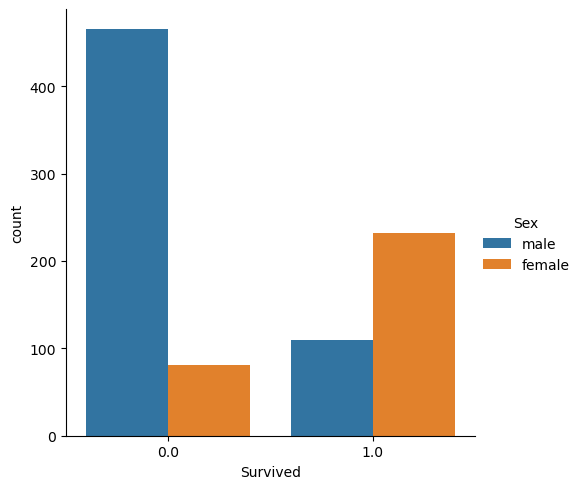

In [15]:
sns.catplot(x ="Survived", hue ="Sex", 
kind ="count", data = df)

* Most of male didnot survive and most of femal survived. Gender greatly affects whether you can survive.
* Because the number of male survived is almost equal to the number of the female not survive, that's why the distributions of "Survived" and "Sex" are similar.

### 4.2 Exploration of SibSp, Parch and Fare

* As the "SibSp" and "Parch" are related to relatives and family. To simplify this analysis, let create a new feature named family
* family, which mean size of the pasenger's family, equal to "SibSp + Parch + himself"

In [16]:
df['Family'] = df['SibSp'] + df['Parch'] +1
df = df.drop(['SibSp', 'Parch'], axis=1)


In [17]:
df[df['Fare']==0]


,Survived,Sex,Fare,Age_wiki,Boarded,Class,Family
179,0.0,male,0.0,36.0,Southampton,3.0,1
263,0.0,male,0.0,45.0,Southampton,1.0,1
271,1.0,male,0.0,25.0,Southampton,3.0,1
277,0.0,male,0.0,18.0,Belfast,2.0,1
302,0.0,male,0.0,19.0,Southampton,3.0,1
413,0.0,male,0.0,21.0,Belfast,2.0,1
466,0.0,male,0.0,21.0,Belfast,2.0,1
481,0.0,male,0.0,37.0,Belfast,2.0,1
597,0.0,male,0.0,49.0,Southampton,3.0,1
633,0.0,male,0.0,29.0,Belfast,1.0,1


df.shape (887, 2)
nCol:2 nGrapShown:2 nGraphRow:2


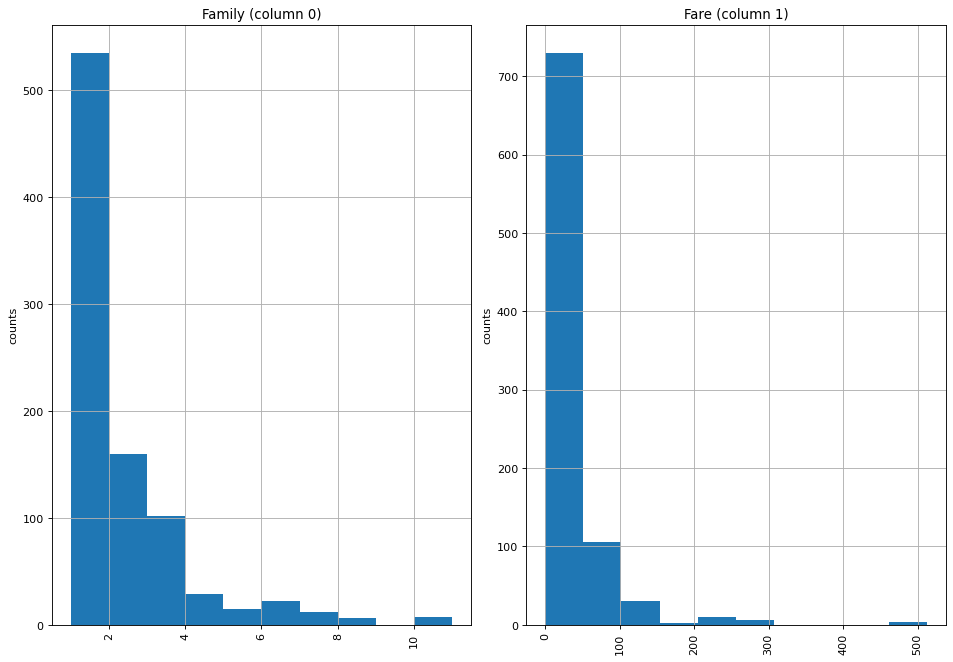

In [18]:
plotPerColumnDistribution(df[['Family', 'Fare']], 2, 2)

<Axes: xlabel='Family'>

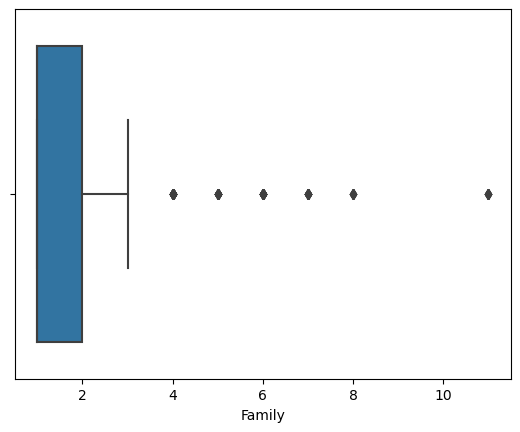

In [35]:
"""sns.catplot(x ="Family", y ="Fare", hue ="Survived", kind='count',
data = df)"""
#df[df['Fare']>400]
sns.boxplot(x=df['Family'])


In [36]:
df[df['Family']>3].count

<bound method DataFrame.count of      Survived     Sex     Fare  Age_wiki      Boarded  Class  Family
7         0.0    male  21.0750       2.0  Southampton    3.0       5
13        0.0    male  31.2750      39.0  Southampton    3.0       7
16        0.0    male  29.1250       2.0   Queenstown    3.0       6
24        0.0  female  21.0750       8.0  Southampton    3.0       5
25        1.0  female  31.3875      38.0  Southampton    3.0       7
..        ...     ...      ...       ...          ...    ...     ...
850       0.0    male  31.2750       4.0  Southampton    3.0       7
858       1.0  female  19.2583      24.0    Cherbourg    3.0       4
863       0.0  female  69.5500      14.0  Southampton    3.0      11
885       0.0  female  29.1250      39.0   Queenstown    3.0       6
888       0.0  female  23.4500       7.0  Southampton    3.0       4

[91 rows x 7 columns]>

<Axes: xlabel='Fare'>

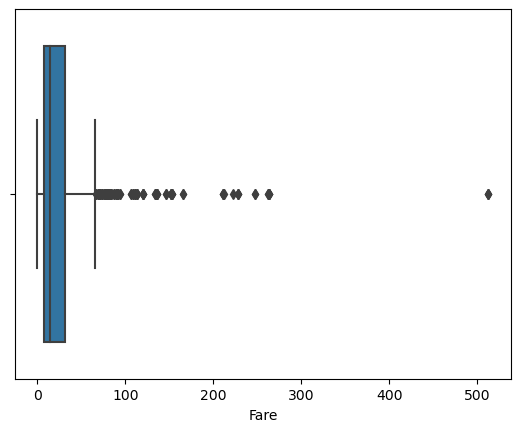

In [27]:
sns.boxplot(x=df['Fare'])

In [37]:
df[df['Fare']>80].count

#df[df['Family']==1]

<bound method DataFrame.count of      Survived     Sex      Fare  Age_wiki      Boarded  Class  Family
27        0.0    male  263.0000      19.0  Southampton    1.0       6
31        1.0  female  146.5208      45.0    Cherbourg    1.0       2
34        0.0    male   82.1708      28.0    Cherbourg    1.0       2
62        0.0    male   83.4750      45.0  Southampton    1.0       2
88        1.0  female  263.0000      23.0  Southampton    1.0       6
..        ...     ...       ...       ...          ...    ...     ...
820       1.0  female   93.5000      52.0  Southampton    1.0       3
835       1.0  female   83.1583      39.0    Cherbourg    1.0       3
849       1.0  female   89.1042      40.0    Cherbourg    1.0       2
856       1.0  female  164.8667      45.0  Southampton    1.0       3
879       1.0  female   83.1583      56.0    Cherbourg    1.0       2

[73 rows x 7 columns]>

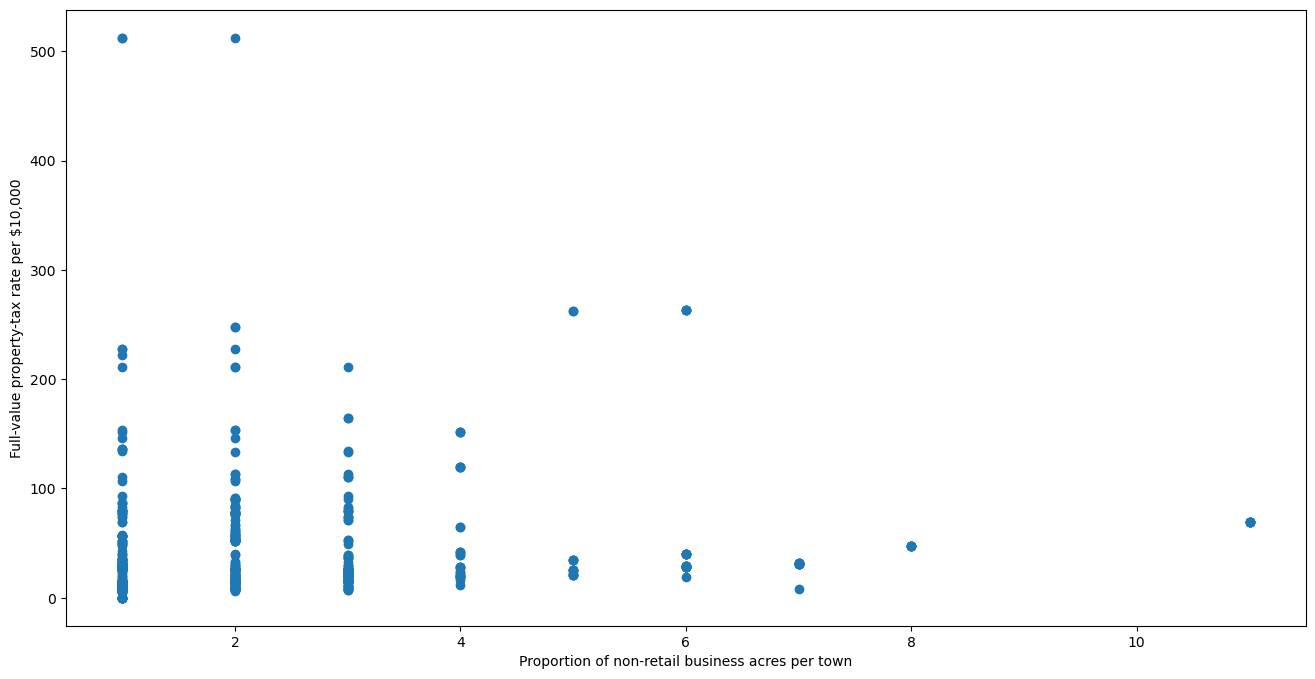

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Family'], df['Fare'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [34]:
df[df['Fare']>80]

,Survived,Sex,Fare,Age_wiki,Boarded,Class,Family
27,0.0,male,263.0000,19.0,Southampton,1.0,6
31,1.0,female,146.5208,45.0,Cherbourg,1.0,2
34,0.0,male,82.1708,28.0,Cherbourg,1.0,2
62,0.0,male,83.4750,45.0,Southampton,1.0,2
88,1.0,female,263.0000,23.0,Southampton,1.0,6
...,...,...,...,...,...,...,...
820,1.0,female,93.5000,52.0,Southampton,1.0,3
835,1.0,female,83.1583,39.0,Cherbourg,1.0,3
849,1.0,female,89.1042,40.0,Cherbourg,1.0,2
856,1.0,female,164.8667,45.0,Southampton,1.0,3


In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [ ]:
for column_name, colume_value in df.iteritems():
    print("column:{} unique:{}".format(column_name, colume_value.unique()))

### 4.1 Exploration of Sex

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

In [ ]:
plt.plot(df['Sex_female'].count())
#df.head()
df['Sex_female']

* Use the sns.barplot api to show the survived rate on male and female. 
* As we can see female has very high chance to survive ant that means our expectation.

### 4.2 Exploration of SibSp

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.show()

### 4.3 Exploration of Parch

In [ ]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.show()

### 4.4 Exploration of Boarded

In [ ]:
sns.barplot(x='Boarded', y='Survived', data=df)
plt.show()

### 4.5 Exploration of Class

In [ ]:
sns.barplot(x='Class', y='Survived', data=df)
plt.show()

Use the sns.barplot api to show the survived rate on male and female. As we can see female has very high chance to survive ant that means our expectation.

### 4.6 Exploration of Fare



In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], color="lightcoral", shade=True)
sns.kdeplot(df["Fare"], color="lightblue",shade=True)
plt.legend(['Survived', 'Died', 'total'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### 4.7 Exploration of Age



In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age_wiki"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age_wiki"][df.Survived == 0], color="lightcoral", shade=True)
sns.kdeplot(df["Age_wiki"], color="lightblue",shade=True)
plt.legend(['Survived', 'Died', 'total'])

plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-20,100)
plt.show()

In [ ]:
df=pd.get_dummies(df, columns=["Sex","Boarded"])
df=df.drop(['Sex_male', 'Boarded_Belfast'], axis=1)
df.info()

In [ ]:

sns.heatmap(df.corr(), annot=True, fmt=".1f")
sns.pairplot(df, diag_kind='kde')

As the fare and class are correlated, I choose to drop class and remain fare.

In [ ]:
df=df.drop(['Boarded_Cherbourg'], axis=1)
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [ ]:
for column_name, colume_value in df.iteritems():
    print("column:{} unique:{}".format(column_name, colume_value.unique()))

Note the Dtaype of Sex is object, we need to conver it to number before feed them to trainning model.

In [ ]:
"""df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df.info()
df.head()"""

## 5. Models and analysis

#### 5.1 Splite the dataset to train set and test set

In [ ]:

train_data, test_data = train_test_split(
  df, random_state=0, test_size=0.2)
train_data.info()

X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']


### 5.2 Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Test set Accuracy: {clf.score(X_test, y_test)}")
print(f"Train set Accuracy: {clf.score(X_train, y_train)}")

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Test set Accuracy:", accuracy)

y_pred = best_rf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print("Train set Accuracy:", accuracy)

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
least_important_features = ['Parch', 'Boarded_Queenstown', 'Boarded_Southampton', 'SibSp']
X_train_3 = X_train.drop(least_important_features, axis=1)
X_test_3 = X_test.drop(least_important_features, axis=1)

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_3, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)



In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test_3)

accuracy = accuracy_score(y_test, y_pred)

print("Test set Accuracy:", accuracy)

y_pred = best_rf.predict(X_train_3)
accuracy = accuracy_score(y_train, y_pred)

print("Train set Accuracy:", accuracy)

### 5.3 Build Logistic regression model

In [ ]:
df.info()

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)


In [ ]:
y_pred_test = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy)

In [ ]:
y_pred_train = logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Training set accuracy:", accuracy)

#### Checking for overfitting
The accuracy on training set is 0.8152 while the accuracy on test set is 0.7528. The former is obviously bigger the the latter one, therefore this is overfitting in this model.

In [ ]:
logreg = LogisticRegression(solver='liblinear')
scores_accuracy = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
scores_accuracy.mean()

In [ ]:
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(solver='liblinear')
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

In [ ]:
coef = grid_search.best_estimator_.coef_
coef

In [ ]:
X_train.head()

In [ ]:
least_important_features = ['Parch', 'Fare', 'Boarded_Queenstown', 'Age_wiki']
X_train_2 = X_train.drop(least_important_features, axis=1)
X_test_2 = X_test.drop(least_important_features, axis=1)

logreg = LogisticRegression(solver='liblinear')
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_2, y_train)

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_2, y_test)))
coef = grid_search.best_estimator_.coef_
coef

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print("df.shape", df.shape)
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print("nCol:{} nGrapShown:{} nGraphRow:{}".format(nCol, nGraphShown, nGraphRow))
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(df, 18, 3)

In [ ]:
#unhelpful_features = ['PassengerId', 'Ticket', 'WikiId', 'Name_wiki', 'Hometown', 'Boarded', 'Destination']
#unhelpful_features = ['PassengerId', 'Ticket', 'WikiId', 'Name_wiki']



In [ ]:
plotPerColumnDistribution(df, 12, 4)